<a href="https://colab.research.google.com/github/Avadhesh-Kumar45/Digital-Image-Processing---Lab/blob/main/AP22110011079_Exp_8_Avadhesh_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Take a low-contrast grayscale image (A) and a high-contrast grayscale image
 (B). Write a program to improve the contrast of A with the help of image B using histogram specification or matching. The function prototype is as follows: Histogram_sp(input_Image, specified_Iage, no_of_bins); The function should return the enhanced image.**

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read images
img = cv.imread('/content/Lenna.png', cv.IMREAD_GRAYSCALE)
specified = cv.imread('/content/high-contrast.webp', cv.IMREAD_GRAYSCALE)

**Histogram specification**

In [5]:
def hist_specification(input_image, specified_image, no_of_bins=256):
    # Compute histograms and CDFs
    input_hist, _ = np.histogram(input_image.flatten(), no_of_bins, [0, 256])
    specified_hist, _ = np.histogram(specified_image.flatten(), no_of_bins, [0, 256])

    input_cdf = np.cumsum(input_hist).astype(np.float32)
    specified_cdf = np.cumsum(specified_hist).astype(np.float32)

    # Normalize CDFs
    input_cdf /= input_cdf[-1]
    specified_cdf /= specified_cdf[-1]

    # Create intensity mapping using interpolation
    mapping = np.interp(input_cdf, specified_cdf, np.arange(256)).astype(np.uint8)

    # Apply mapping
    enhanced_image = mapping[input_image]

    return enhanced_image

**Apply histogram specification**

In [6]:
enhanced_img = hist_specification(img, specified)

**Plot results**

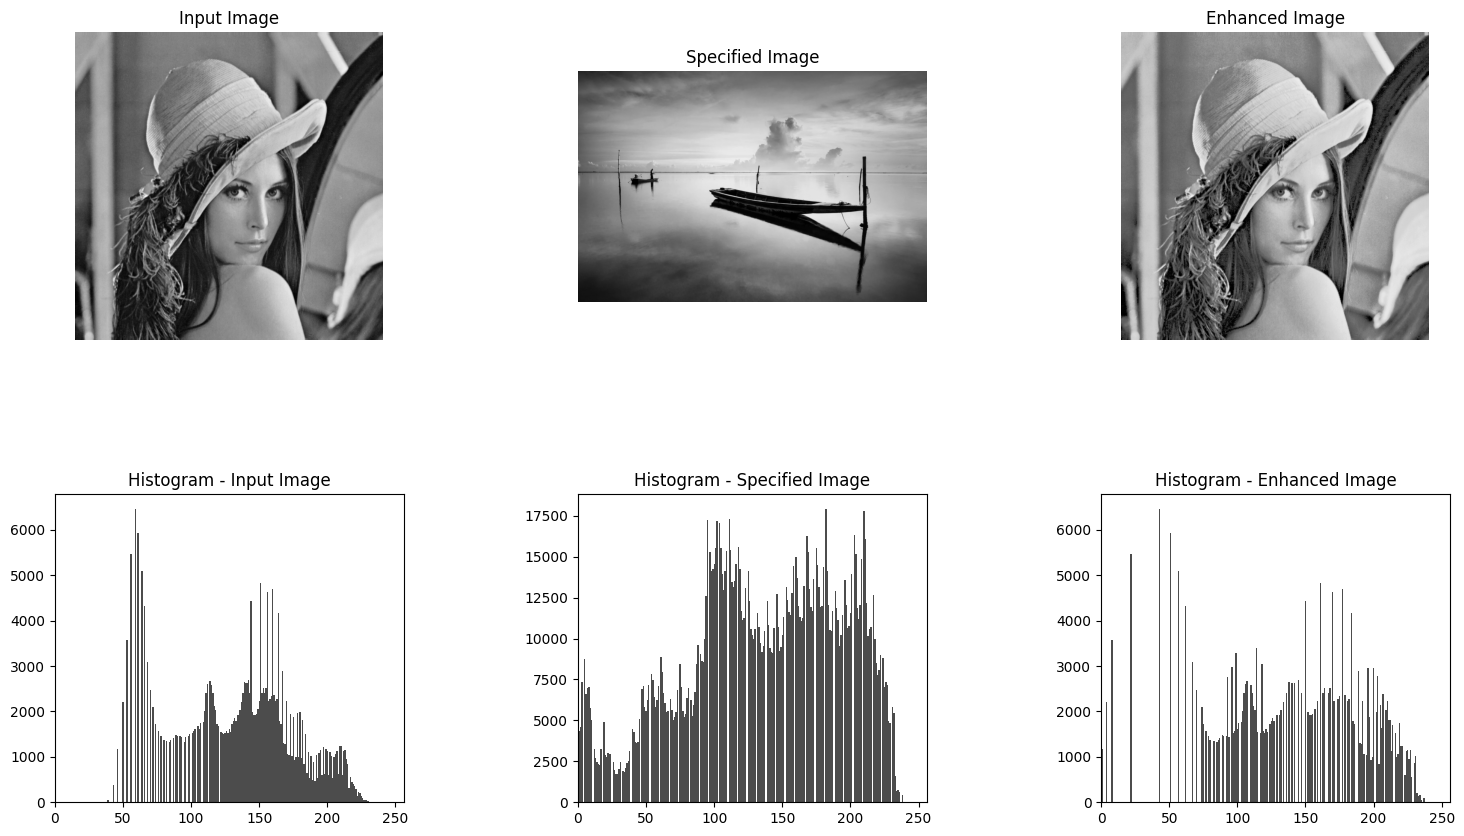

In [10]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

images = [img, specified, enhanced_img]
titles = ["Input Image", "Specified Image", "Enhanced Image"]

for i in range(3):
    axes[0, i].imshow(images[i], cmap="gray")
    axes[0, i].set_title(titles[i])
    axes[0, i].axis("off")

    hist, bins = np.histogram(images[i].flatten(), 256, [0, 256])
    axes[1, i].bar(bins[:-1], hist, width=1, color="black", alpha=0.7)
    axes[1, i].set_xlim([0, 256])
    axes[1, i].set_title(f"Histogram - {titles[i]}")

plt.show()